# Programming Assignment 3 (PA3): Ballistic Motion

### CS70 — Foundations of Applied Computer Science
---

This notebook contains literate code, i.e. brief fragments of Python surrounded by descriptive text (using Markdown). Please complete/extend this notebook for your homework submission:

* For any mathematical questions, make sure to **show you work**.
* For any questions that ask for code, please **also provide a short description of what your solution is doing and how it works**, either by adding comments or in an extra markdown cell.

Make sure to use the reference Python distribution so that project files can be opened by the TAs. In this course, we use [Anaconda](https://www.anaconda.com/products/individual), specifically the version based on Python 3.8.

<div class="alert alert-warning">
Homework assignments in CS70 count towards your final grade and must therefore be done individually.
</div>

## Import statements

We provide the import statements required to complete the assignment in the following cell. 

<div class="alert alert-danger" role="alert">
    <b>Import policy:</b> You must not use any <code>import</code>'s other than the ones we provide.
</div>

<div class="alert alert-info" role="alert">
    <b>Run</b> the following cell in the Jupyter Notebook to include the required modules. It imports libraries such as NumPy and Matplotlib and configures them to produce nice graphics.
</div>

In [8]:
import numpy as np # for building and manipulating matrices
from matplotlib import pyplot as plt # for graphics

# for figure interactivity
%matplotlib notebook 
# good resolution retina graphics
%config InlineBackend.figure_format='retina' 

# The Setup

YouTube is littered with fake videos of purportedly amazing basketball shots. In this assignment, you will write code to analyze the trajectory of ballistic or projectile motion in a video to determine if it is real or not. Ballistic motion occurs when the only significant force on an object is gravity (e.g., a basketball free-throw). We will analyze videos in which this type of motion is imaged such that the camera is perfectly perpendicular to the object’s path of motion.

You will be graded on the correctness, design, efficiency, and documentation of your code. Thus, try to limit as much as possible the use of loops in your code by vectorizing operations and by taking advantage of NumPy's built-in functions.

We will focus our analysis on spherical balls undergoing ballistic motion. The video below shows a moving ball:

In [9]:
from ipywidgets import Video
video = Video.from_file('ball.mp4')
video

Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01mp41mp42isom\x00\x00\x00\x08wide\x00\x02\xfa\x1d...')

Given individual .jpg frames from this video, our first task is to extract the spatial coordinates (x, y) using mouse clicks on the center of the ball on each frame. One way we can simplify this process is by building a composite image that shows the ball's movement across the frames all in one picture. You can then select points from this one image and store those coordinates for later use.

The first step is initialization. There are 100 video frames in the zip file. Some of the videos that we will have you analyze have a large number of video frames, so to simplify things we will only analyze every fourth frame. Set up a constant `STEP` that controls how many frames to use and how many to pass over. If, for example `STEP = 1`, then every frame of the video will be stored; if `STEP = 4`, then only every fourth frame will be stored. You should also set up a constant `TFRAMES` dictating the number of frames to loop through. Lastly, you should set up a `coords` array to store the coordinates. `coords` should be an $n \times 2$ matrix, where $n$ is the number of coordinates you select from the image of ballistic motion. You can set up a NumPy array of zeros using `np.zeros()`, and designate the shape by passing in a tuple `(# of rows, # of cols)` as a parameter. Start off with zero rows and 2 columns.

In [10]:
# initialization
STEP = 4
TFRAMES = 100    
nframes = TFRAMES//STEP
coords = np.zeros((0,2))

The next step is to load the desired frames into a `frames` array. The `frames` matrix should be a 4-dimensional matrix of dimensions height $\times$ width $\times$ num channels $\times$ num frames. The height and width of an image can be accessed by calling `.shape[0]` and `.shape[1]` on an individual frame. We are using color videos, so the number of channels (red, green, blue) is 3. Num frames is again the desired number of frames to store. You will need to pass in `dtype = np.uint8` after the shape parameter in the empty matrix to specify the matrix objects as pixel values. You can load one frame by calling `plt.imread('framefilename')`, or load multiple frames using `plt.imread('frame%d.jpg' % c)` where c is the frame number.

In [11]:
# load frames into matrix
height, width, channels = plt.imread('vidframes/frame1.jpg').shape
frames = np.empty((height,width,channels,nframes),dtype = np.uint8) # set up empty frames matrix
k = 0 # index for frames matrix

# loop through frames
for i in range(nframes):
    frame = plt.imread('vidframes/frame%d.jpg' % (i * STEP + 1))   # read in frames
    frames[:,:,:,i] = frame # store frame

Now let's build the composite image. As you can see in the video above, the ball is a dark color relative to the rest of the image. Thus, we can compile its motion across the frames by building a new image that features the darkest (minimum) pixel values from each image. We can do this using the `np.amin` function without any loops (check `help(np.amin)`).

In [12]:
composite = np.amin(frames, axis=3)

Run the cell below to check if your composite image was created correctly. The image should contain the ballistic motion of the ball at 25 moments.

<IPython.core.display.Javascript object>


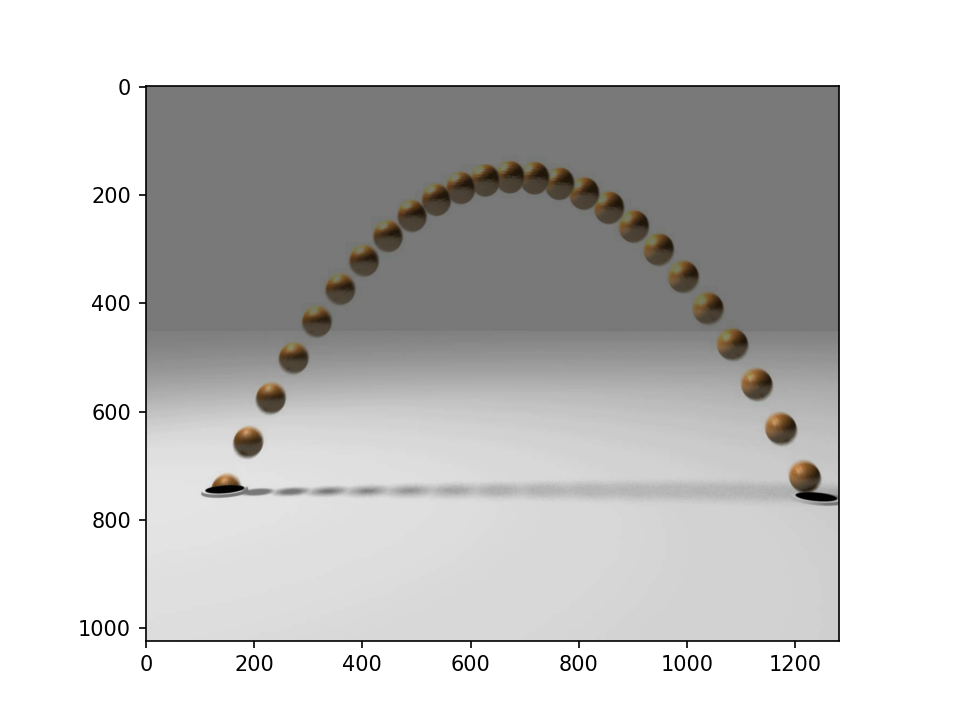

In [13]:
fig = plt.figure()
plt.imshow(composite)
plt.show()

Now onto the coordinate selection. The function below will handle your mouse clicks so that each mouse click on the ball center will be passed to this function. `event.xdata` and `event.ydata` contain the image x and y coordinates, respectively.

Within the function, we add the newest x and y coordinates from the mouse click in the `coords` matrix. We use the `np.vstack` function to add a new row to the bottom of a matrix.

The function also plots the clicked point as a red dot, and change the title of the plot. This is already done for you.

In [14]:
# function handling button clicks
def onclick(event):
    global coords
    coords = np.vstack((coords, [event.xdata, event.ydata]))
    plt.title(f"Composite Image ({coords.shape[0]} points clicked)")
    plt.scatter([event.xdata], [event.ydata], c='r', s=20)

To actually select coordinates, you should load and display your composite image within an interactive interface. Run the following code to produce this interface. Click the ball centers in your composite image to store your coordinates. You need not click on all the displayed ball centers (although you certainly can for the most data), but you should click on enough to effectively capture the ball trajectory. Once you are done, you should have populated your `coords` matrix.

<IPython.core.display.Javascript object>


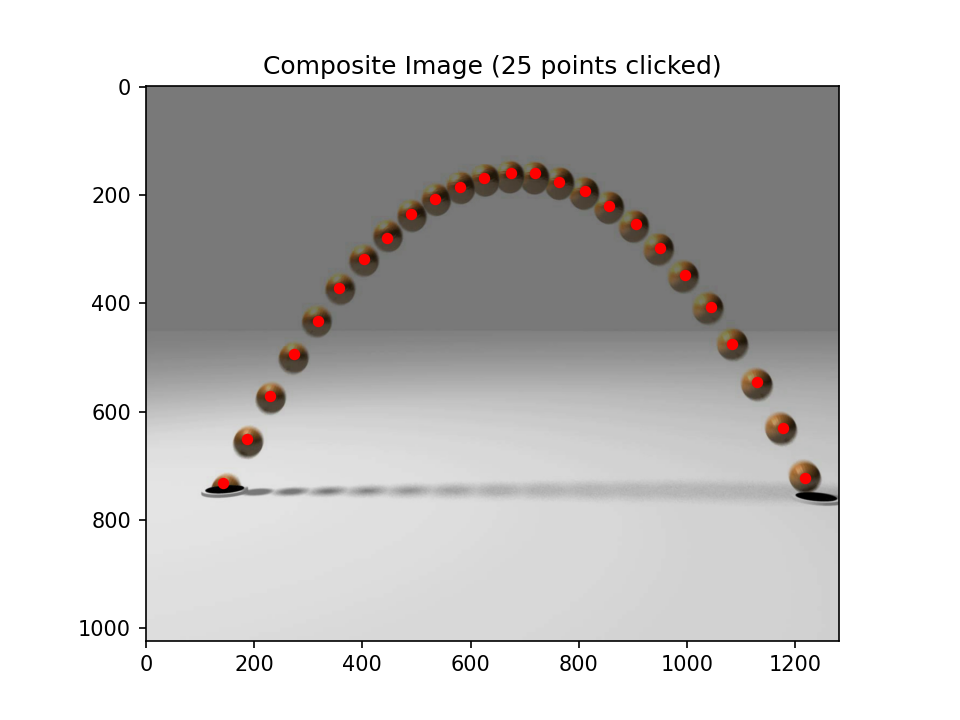

In [15]:
# load your composite image and select ball coordinates
fig = plt.figure()
plt.imshow(composite)
cid = fig.canvas.mpl_connect('button_press_event', onclick) # for handling button click
plt.title("Composite Image (Click ball centers)")
plt.show()

Before moving on, let's check that our `coords` matrix has been correctly populated. Do this by printing out your `coords` matrix and its dimensions. For convenience, also store the clicked x and y coordinates as separate vectors `x` and `y`.

In [16]:
# print coords and dimensions
print("Coords is a (%d,%d) matrix with elements:" % (coords.shape[0], coords.shape[1]))
print(coords)

Coords is a (25,2) matrix with elements:
[[ 142.99203531  731.57502198]
 [ 187.32103964  651.22870164]
 [ 228.8794812   570.88238129]
 [ 273.20848552  493.30662371]
 [ 317.53748985  432.35424276]
 [ 356.32536864  371.40186181]
 [ 403.42493574  318.76116917]
 [ 444.9833773   279.04978355]
 [ 489.31238163  234.72077922]
 [ 533.64138596  207.01515152]
 [ 580.74095306  184.85064935]
 [ 625.06995739  168.22727273]
 [ 674.94008726  159.91558442]
 [ 719.26909159  159.91558442]
 [ 763.59809591  176.53896104]
 [ 810.69766301  193.16233766]
 [ 855.02666734  220.86796537]
 [ 904.89679721  254.11471861]
 [ 949.22580154  298.44372294]
 [ 996.32536864  348.31385281]
 [1043.42493574  406.495671  ]
 [1082.21281453  475.75974026]
 [1129.31238163  545.02380952]
 [1176.41194873  630.91125541]
 [1217.97039029  722.33982684]]


To avoid having to click the points every time you come back to this notebook, let's save the coords matrix to a file.

In [17]:
np.savetxt('coords.txt', coords)

# The estimation

Ok, now let's load the coords back in from the text file and, for convenience, also store the clicked x and y coordinates as separate vectors `x` and `y`.

In [18]:
coords = np.loadtxt('coords.txt')
# print coords and dimensions
print("Coords is a (%d,%d) matrix with elements:" % (coords.shape[0], coords.shape[1]))
print(coords)

x = coords[:,0]
y = coords[:,1]

Coords is a (25,2) matrix with elements:
[[ 142.99203531  731.57502198]
 [ 187.32103964  651.22870164]
 [ 228.8794812   570.88238129]
 [ 273.20848552  493.30662371]
 [ 317.53748985  432.35424276]
 [ 356.32536864  371.40186181]
 [ 403.42493574  318.76116917]
 [ 444.9833773   279.04978355]
 [ 489.31238163  234.72077922]
 [ 533.64138596  207.01515152]
 [ 580.74095306  184.85064935]
 [ 625.06995739  168.22727273]
 [ 674.94008726  159.91558442]
 [ 719.26909159  159.91558442]
 [ 763.59809591  176.53896104]
 [ 810.69766301  193.16233766]
 [ 855.02666734  220.86796537]
 [ 904.89679721  254.11471861]
 [ 949.22580154  298.44372294]
 [ 996.32536864  348.31385281]
 [1043.42493574  406.495671  ]
 [1082.21281453  475.75974026]
 [1129.31238163  545.02380952]
 [1176.41194873  630.91125541]
 [1217.97039029  722.33982684]]


<div class="alert alert-info" role="alert">
<b>TODO:</b>
    
For each of the following equations, construct a least-squares estimator to estimate the unknowns ($a$ and $b$ or $a$, $b$, and $c$). The known quantities are the $(x, y)$ values in `coords`.
1. Line: $y = ax + b$
2. Parabola: $y = ax^{2} +bx+c$
3. Parabola with no first-order term: $y = ax^{2} + b$
4. Sinusoid: $y = a\sin(\frac{1}{335.5}x−9.9)+b$

For each equation, compute the mean squared-error as a measure of goodness of fit. In our case, this will be the mean squared-error between the $n$ user-selected y−coordinates and each model’s prediction of the $y$−coordinates: 
$\frac{1}{n}\sum_{i=1}^{n}(y_{i} − \hat{y}_{i})^{2}$, where $y$ are the user-selected coordinates and $\hat{y}$ are the model predicted coordinates (notice that in this measure of error, we assume that the $x$−coordinate is correct and all of the error is in the $y$−coordinate).

Print out the error for each of the above models. Using these error measurements, confirm that the parabola described above provides the best fit to the data (i.e., has the smallest mean squared-error).

**Warning:** You may use `np.linalg.solve`, but not `np.linalg.inv`.
Please form the normal equations and use solve. Do not use `polyfit` or other built-ins.
</div>

In [96]:
#### initialization
equation_names = ['line','parabola', 'parabola w/ no first-order term', 'sinusoid']
min_index = 0              # min_index stores the index of the equation that produces the minimum error
plotX = np.empty((len(equation_names)), dtype=np.ndarray)
plotY = np.empty((len(equation_names)), dtype=np.ndarray)

X = coords[:,0]
plotX = np.linspace(np.min(X), np.max(X), num=100) #make the matrix for plotting the graphs later

#### Your tasks: 
#### (1) calculate the least-squares error for each model and PRINT them; 

### function to calcluate error from predicted - actual values

def calculate_least_squares_error(A, x, b):
    # Predicted y values
    P = A @ x   
    # Raw error = real y - predicted y
    E = b - P  
    # Square of errors
    E_sq = E ** 2    
    # Sum of squared errors
    least_squares_error = np.sum(E_sq)
    
    return least_squares_error

## Least squares model for line:

#initialize matrix to hold the x and 1 
lA = np.zeros((coords.shape[0], 2))
for x in range(lA.shape[0]):  # Use range to iterate over indices
    lA[x, :] = [coords[x, 0], 1]

lb = np.zeros((coords.shape[0], 1))
for y in range(lb.shape[0]):  # Use range to iterate over indices
    lb[y] = coords[y, 1]
    
lx = np.linalg.solve(lA.T @ lA, lA.T @ lb) 

m, b = lx[0, 0], lx[1, 0]
plotY[0] = m * plotX + b

le = calculate_least_squares_error(lA, lx, lb)
print("The least squares error for the line equation is:")
print(le) # this is the final E that we will be comparing

### Least squares model for parabola:

#initialize matrix to hold the xsqr, x, and 1 
pA = np.zeros((coords.shape[0], 3))
for x in range(pA.shape[0]):  # Use range to iterate over indices
    pA[x, :] = [coords[x, 0] ** 2, coords[x, 0], 1]

pb = np.zeros((coords.shape[0], 1))
for y in range(pb.shape[0]):  # Use range to iterate over indices
    pb[y] = coords[y, 1]
    plotY[1] = pb[:,0]

px = np.linalg.solve(pA.T @ pA, pA.T @ pb) 

a, b, c = px[0, 0], px[1, 0], px[2, 0]
plotY[1] = a * plotX **2 + b * plotX + c

pe = calculate_least_squares_error(pA, px, pb)
print("The least squares error for the parabola equation is:")
print(pe) # this is the final E that we will be comparing


### Least squares model for parabola with no first order term:

#initialize matrix to hold the xsqr and 1
PA = np.zeros((coords.shape[0], 2))
for x in range(PA.shape[0]):  # Use range to iterate over indices    
    PA[x, :] = [coords[x, 0] ** 2, 1]



Pb = np.zeros((coords.shape[0], 1))
for y in range(Pb.shape[0]):  # Use range to iterate over indices
    Pb[y] = coords[y, 1]

Px = np.linalg.solve(PA.T @ PA, PA.T @ Pb) 

a, b = Px[0, 0], Px[1, 0]
plotY[2] = a * (plotX**2) + b 

Pe = calculate_least_squares_error(PA, Px, Pb)
print("The least squares error for the parabola equation is:")
print(Pe) # this is the final E that we will be comparing


## Least squares model for sinusoid:

#initialize matrix to hold the x and 1 
SA = np.zeros((coords.shape[0], 2))
for x in range(SA.shape[0]):  # Use range to iterate over indices
    sin = np.sin((1 / 335.5) * coords[x, 0] - 9.9)
    SA[x, :] = [sin, 1]

Sb = np.zeros((coords.shape[0], 1))
for y in range(Sb.shape[0]):  # Use range to iterate over indices
    Sb[y] = coords[y, 1]

Sx = np.linalg.solve(SA.T @ SA, SA.T @ Sb) 

a, b = Sx[0, 0], Sx[1, 0]
plotY[3] = a * np.sin((1 / 335.5) * plotX - 9.9) + b


Se = calculate_least_squares_error(SA, Sx, Sb)
print("The least squares error for the line equation is:")
print(Se) # this is the final E that we will be comparing



#### (2) select the one with the minimum error and set the index in min_index.
min_index = 1

# Print the best model based on lowest mean squared error.
print('The best model is equation ' + str(equation_names[min_index]))


The least squares error for the line equation is:
832549.6643626081
The least squares error for the parabola equation is:
281.74533230736085
The least squares error for the parabola equation is:
809345.3406631784
The least squares error for the line equation is:
3441.612632179043
The best model is equation parabola


<div class="alert alert-info" role="alert">
<b>TODO:</b>

To help you visually assess how well each model fits the underlying data, plot the least-squares line or curve overlaid atop your selected points. Because our sampling of the coordinates is pretty sparse, you’ll want to plot this curve with a denser sampling of x− and y−coordinates. Use the `np.linspace` function to generate a dense, regularly spaced set of x-coordinates.
</div>

*Hint:* In Matplotlib, you can create several plots within one figure by calling `fig, axs = plt.subplots(# of rows, # of columns)` where `fig` and `axs` are the figure and axes, respectively. You can access a specific axis by calling `axs[row,column]`. Also, remember to reverse the y axis, as the origin in image plots is in the upper left corner whereas the origin in Matplotlib plots is in the bottom left corner. To reverse the y axis of your plot, the following command can be called on your axes: `.invert_yaxis()`

<IPython.core.display.Javascript object>


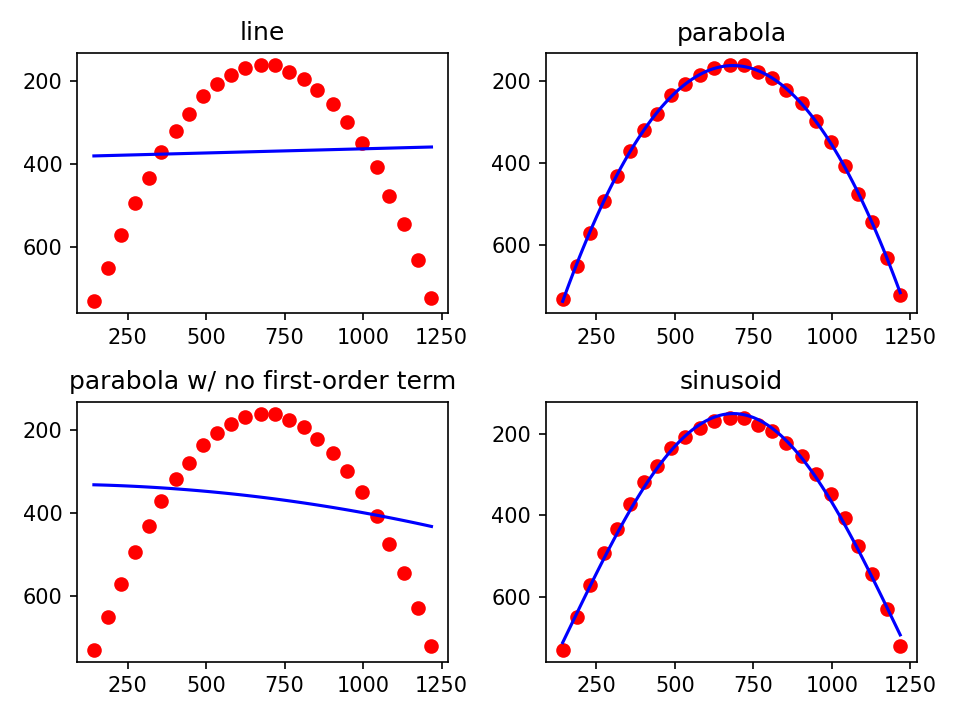

In [97]:
# display: Plot all equation models against your coordinates
fig, axs = plt.subplots(2,2,)
f = 0  #equation index
for row in range(2):
    for col in range(2):
        #### Your tasks: 
        #### (1) draw the curve for each model
        x_values = plotX
        y_values = plotY[f]
        
        axs[row, col].plot(x_values, y_values, color = "b")
        
        #### (2) draw the data points for each model;
        axs[row, col].scatter(coords[:,0], coords[:,1], color = "r")
        #### (3) reverse the y axis to follow the bottom-left-corner style;
        axs[row, col].invert_yaxis()
        #### (4) specify the title of the plot to the equation's name.
        axs[row, col].set_title(equation_names[f])

        f += 1
plt.tight_layout()


It is always good to verify your solutions by going back to the original data, in our case, the composite image. Write some code to display the image of ballistic motion overlaid with the user-selected positions (`coords`) of the ball and the predicted position of the ball. Confirm that the user-selections and prediction align correctly, thus confirming that this video is authentic.

<IPython.core.display.Javascript object>


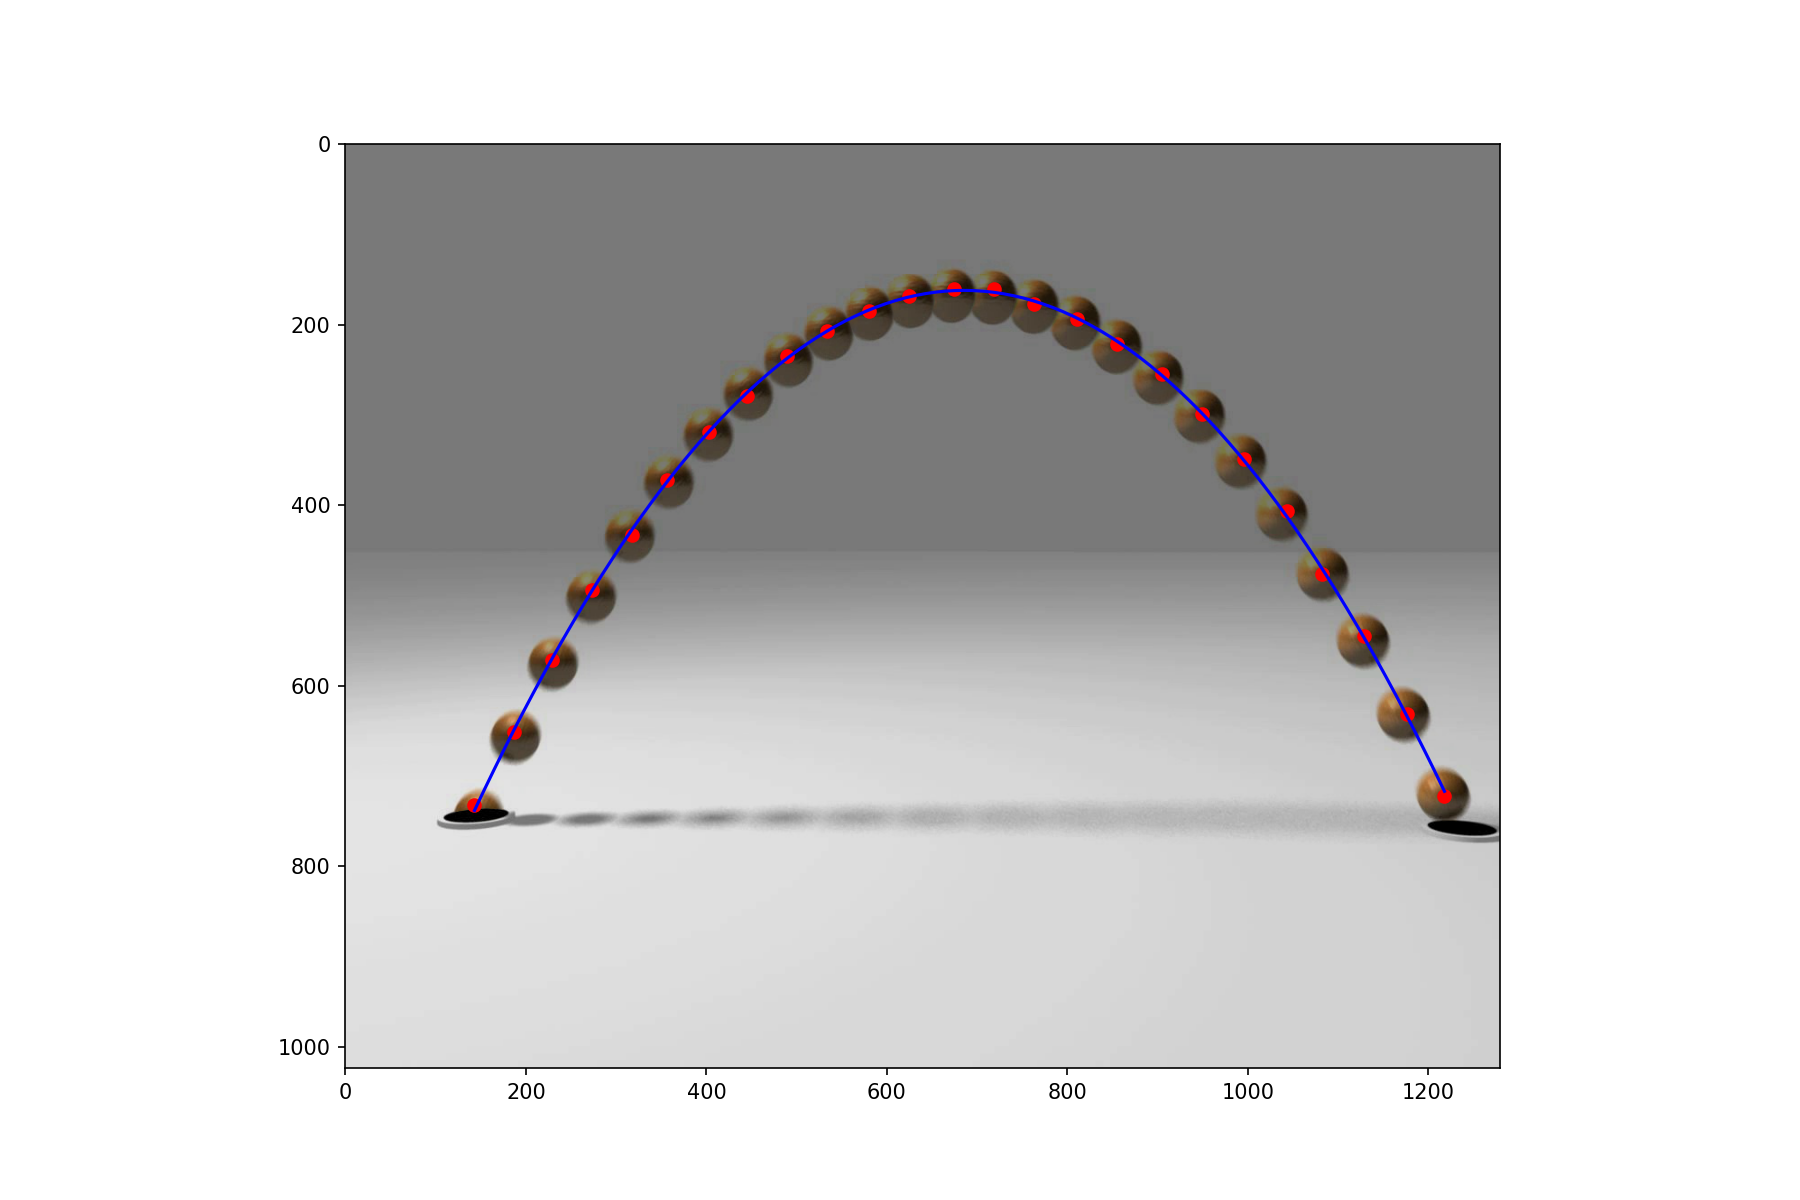

In [71]:
plt.figure()
plt.imshow(composite) # draw the composite image in the background

#### Your tasks:
#### (1) plot the user-selected points;
plt.scatter(coords[:,0], coords[:,1], color = "r")
#### (2) plot the best-fit model curve.
plt.plot(plotX, plotY[1], color = "b")

plt.gcf().set_size_inches(12,8)
plt.show()

## Submitting your work

Before handing in via Canvas, make sure:
  * your notebook runs from top to bottom after selecting "Kernel->Restart & Run All" without causing any errors. To simplify the grading process, please do **not** clear the generated output.
  * you've included any scans/images that your notebook references.
  * you've renamed the provided notebook according to your name and netid as: **[YourFirstName]\_[YourLastName]\_[YourNetId]\_[Assignment].ipynb**. For example, if John Doe has netid **F00237S**, his submission filename for PA1 should be **John_Doe_F00237S_PA1.ipynb**.